In [1]:
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np

import warnings
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS, FITSFixedWarning

In [2]:
import os

 [astropy.io.fits.verify]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


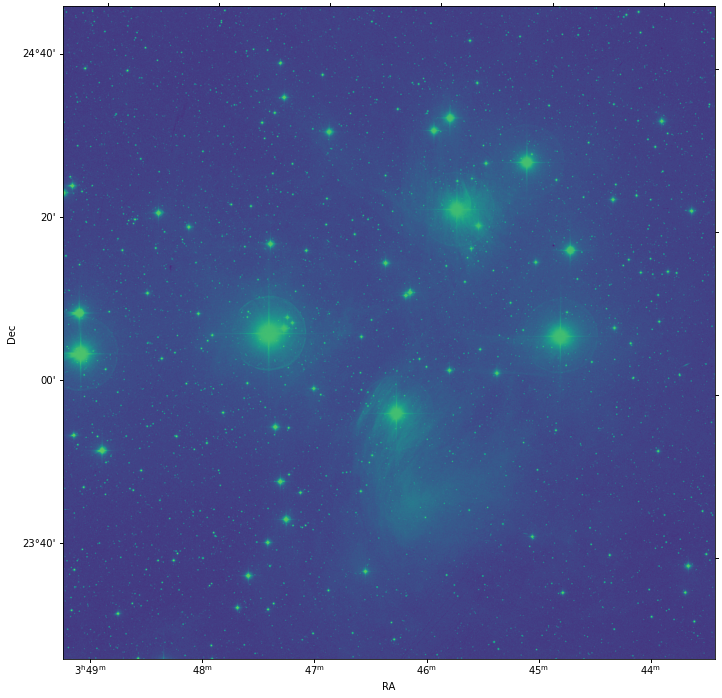

In [3]:
filename =os.path.join(os.path.dirname(os.getcwd()),'data/DSS_Pleiades_large.fits')

hdu = fits.open(filename)[0]
with warnings.catch_warnings():
    # Ignore a warning on using DATE-OBS in place of MJD-OBS
    warnings.filterwarnings('ignore', message="'datfix' made the change",
                            category=FITSFixedWarning)
    wcs = WCS(hdu.header)

fig = plt.figure(figsize=(12,12))
fig.add_subplot(111, projection=wcs)
plt.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
plt.xlabel('RA')
plt.ylabel('Dec')

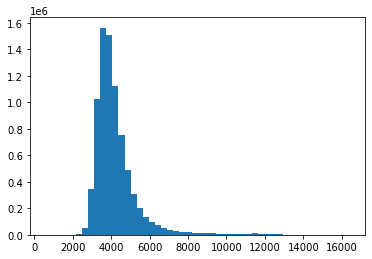

In [4]:
fix, ax = plt.subplots()
zz=ax.hist(hdu.data.flatten(), bins=50)

In [5]:
from scipy.ndimage import find_objects, label, generate_binary_structure, maximum_filter

#convd = convolve(hdu.data, np.ones((5,5))/25.0)
#img_masked = hdu.data > 22000
convd = maximum_filter(hdu.data, size=(5,5))
img_masked = convd > 13000
s = generate_binary_structure(2,2)
labeled_array, nfeatures = label(img_masked, structure=s)
print(f'Features found: {nfeatures}')
locs = find_objects(labeled_array)

Features found: 463


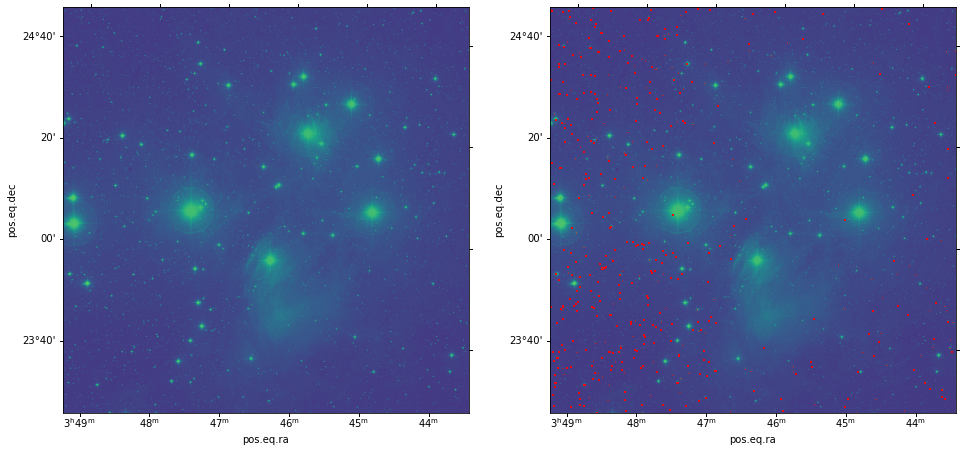

In [6]:
from  matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection


rects = []
for idx in range(nfeatures):
    loc = locs[idx]
    xy = (loc[1].start, loc[0].start)
    width = loc[1].stop - loc[1].start
    height = loc[0].stop - loc[0].start
    rect = Rectangle(xy, width, height, color='red')
    rects.append(rect)

pc = PatchCollection(rects, facecolor='none', edgecolor='red')

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax = fig.add_subplot(122, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax.add_collection(pc)

In [7]:
import sys
sys.path.append(os.path.expanduser('~/repos/runawaysearch/src'))
from gaiastars import gaiastars as gs
import astropy.units as u

In [8]:
flux_cols = ['ra',
 'dec',
 'parallax',
 'pmra',
 'pmdec',
 'radial_velocity',
 'phot_g_mean_mag',
 'phot_bp_mean_mag',
 'phot_rp_mean_mag',
 'ruwe']+['phot_g_mean_flux', 'phot_bp_mean_flux', 'phot_rp_mean_flux']
gs.gaia_column_dict_gaiadr3['gaiadr3.gaia_source']['tblcols'] = flux_cols
gs.gaia_column_dict_gaiadr3['gaiadr3.gaia_source']['tblcols']

['ra',
 'dec',
 'parallax',
 'pmra',
 'pmdec',
 'radial_velocity',
 'phot_g_mean_mag',
 'phot_bp_mean_mag',
 'phot_rp_mean_mag',
 'ruwe',
 'phot_g_mean_flux',
 'phot_bp_mean_flux',
 'phot_rp_mean_flux']

In [9]:
import pandas as pd
df = pd.read_csv('../lists/pleiades-id.csv')
pleiades_members = df.source_id.to_list()
pleiades = gs(name='Pleiades Members', description='from Columbia Paper')
pleiades.from_source_idlist(pleiades_members)

INFO: Query finished. [astroquery.utils.tap.core]


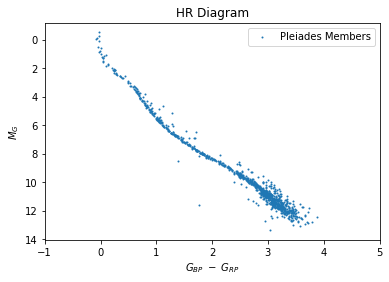

In [10]:
pleiades.plot_hrdiagram()

In [11]:
#need to clip the gaia results to fit in the image
clip_px = 20
lower_left = wcs.pixel_to_world(clip_px, clip_px)
upper_right = wcs.pixel_to_world(hdu.data.shape[1]-clip_px,hdu.data.shape[0]-clip_px)

#ra backwards since x-axis is reveresed
qry_str = f'ra > {upper_right.ra.value} and ra < {lower_left.ra.value} and dec > {lower_left.dec.value} and dec < {upper_right.dec.value}'
pleiades_clipped = pleiades.query(qry_str)
len(pleiades_clipped)

247

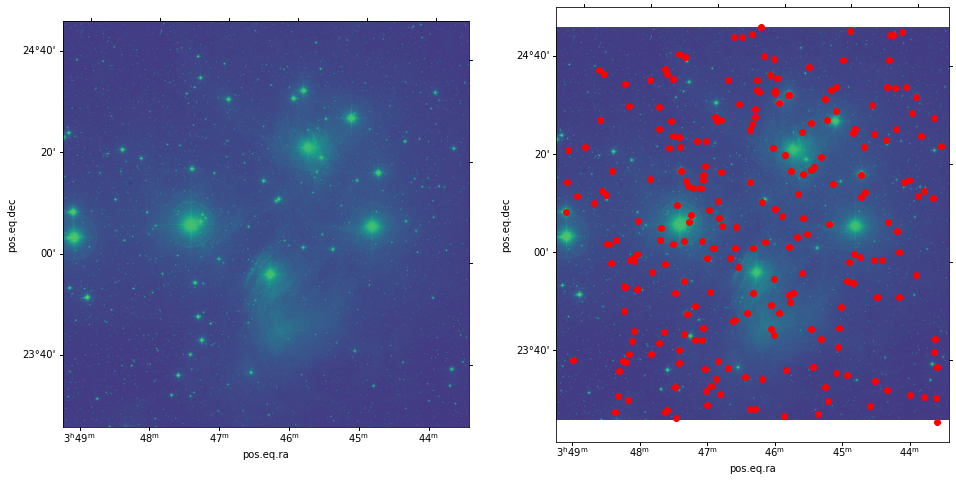

In [12]:
coords = pleiades_clipped.get_coords()
pxs = wcs.world_to_pixel(coords)
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax = fig.add_subplot(122, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax.scatter(pxs[0], pxs[1], color='red')

In [13]:
alcyone = gs(name='Alcyone', description='from Gaia Object Search')
alcyone.from_source_idlist([66714384142368256])

INFO: Query finished. [astroquery.utils.tap.core]


In [14]:
from astropy.coordinates import SkyCoord
import astropy.units as u

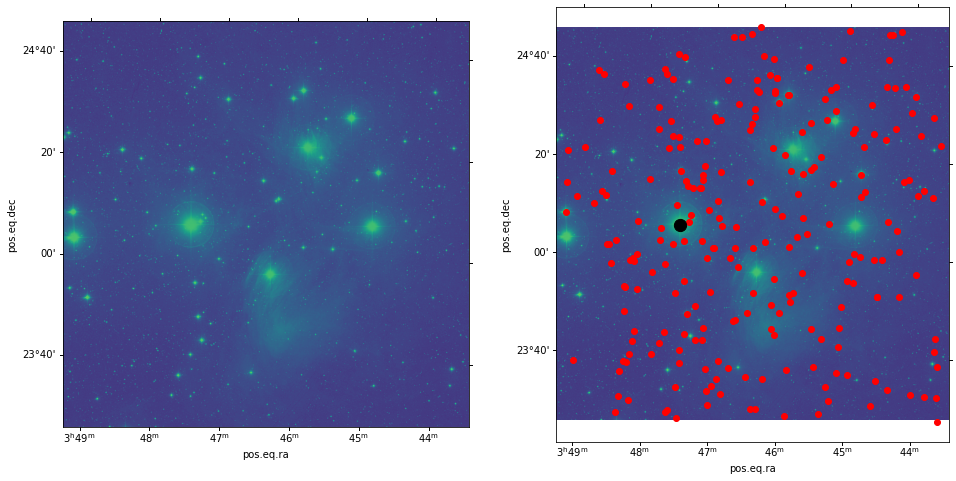

In [15]:
#alcyone_coords = alcyone.get_coords()
alcyone_coords = SkyCoord(alcyone.objs.iloc[0].ra*u.deg, alcyone.objs.iloc[0].dec*u.deg)
alcyone_pxs = wcs.world_to_pixel(alcyone_coords)
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax = fig.add_subplot(122, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax.scatter(pxs[0], pxs[1], color='red')
ax.scatter(alcyone_pxs[0], alcyone_pxs[1], color='black', s=150)

In [16]:
pleiades_biggies_ids = {'Atlas':66526127137440128,
                        'Pleione': 66529975427235712,
                        'Alcyone':66714384142368256,
                        'Merope':65205373152172032,
                        'Electra': 65271996684817280,
                        'Maia':65283232316451328,
                        'Taygeta': 65296907494549120,
                        'Asterope':66798496781121792,
                        'Celaeno':65287458566524928}
idl = [id for id in pleiades_biggies_ids.values()]

pleiades_biggies = gs(name='Big Stars in Pleiades', description='From Wikipedia')
pleiades_biggies.from_source_idlist(idl)

#stuff in missing parallax for Alcyone (source Simbad)
pleiades_biggies.objs.at[66714384142368256,'parallax'] = 8.09
pleiades_biggies.objs.at[66714384142368256,'r_est'] = 1000/8.09

#fix up the names
id_to_name = dict((v,k) for k,v in pleiades_biggies_ids.items())


cols, mags = pleiades_biggies.get_colors()
pleiades_biggies.objs.reset_index(inplace=True)
pleiades_biggies.objs['typed_id']=[id_to_name[t_id] for t_id in pleiades_biggies.objs.typed_id]
pleiades_biggies.objs.set_index('typed_id', inplace=True)

INFO: Query finished. [astroquery.utils.tap.core]


In [17]:
pleiades_biggies.objs

,source_id,ra,dec,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,ruwe,phot_g_mean_flux,phot_bp_mean_flux,phot_rp_mean_flux,r_est
typed_id,,,,,,,,,,,,,,,
Atlas,66526127137440128,57.290689,24.053212,8.118448,19.078968,-46.193245,NaN,3.615795,3.583036,3.619412,4.116527,6.739519e+08,5.037353e+08,2.827439e+08,123.176246
Pleione,66529975427235712,57.296831,24.136498,7.241378,19.496054,-47.649899,NaN,5.203287,5.185276,5.218389,1.303494,1.561823e+08,1.151613e+08,6.483397e+07,138.095257
Alcyone,66714384142368256,56.871251,24.104934,8.090000,NaN,NaN,NaN,2.896132,3.026533,2.878190,NaN,1.307657e+09,8.410149e+08,5.596059e+08,123.609394
Merope,65205373152172032,56.581671,23.948144,7.067029,13.075220,-48.403790,NaN,4.172742,4.148266,4.159457,2.329801,4.035060e+08,2.993024e+08,1.719393e+08,141.502185
Electra,65271996684817280,56.219005,24.113133,8.345685,20.541505,-46.081450,4.795939,3.698209,3.645838,3.733800,2.767541,6.246882e+08,4.754246e+08,2.544709e+08,119.822397
Maia,65283232316451328,56.456796,24.367541,7.671310,19.515752,-45.527310,16.286316,3.863349,3.836872,3.850640,3.542117,5.365463e+08,3.987200e+08,2.285084e+08,130.355833
Taygeta,65296907494549120,56.302163,24.467064,9.544445,16.291673,-47.206094,NaN,4.261022,4.224305,4.331630,2.314559,3.719958e+08,2.790582e+08,1.467257e+08,104.772985
Asterope,66798496781121792,56.477085,24.554305,7.305275,20.331403,-46.022055,11.792832,5.752026,5.729278,5.752268,0.879898,9.421854e+07,6.977594e+07,3.965071e+07,136.887379
Celaeno,65287458566524928,56.200992,24.289268,7.385247,19.849144,-44.965596,16.494202,5.441325,5.419782,5.441004,0.963313,1.254345e+08,9.279061e+07,5.281491e+07,135.405087


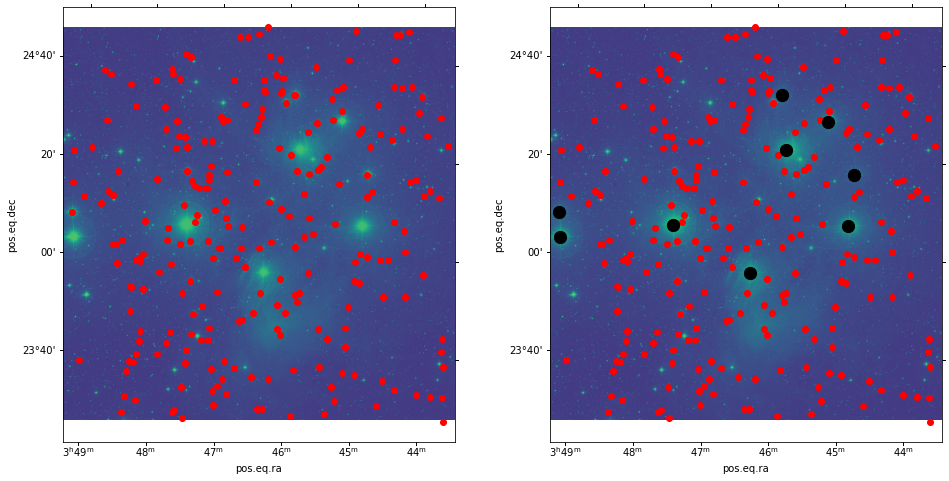

In [18]:
biggies_coords = pleiades_biggies.get_coords()
biggies_pxs = wcs.world_to_pixel(biggies_coords)
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax.scatter(pxs[0], pxs[1], color='red')
ax = fig.add_subplot(122, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
ax.scatter(pxs[0], pxs[1], color='red')
#ax.scatter(alcyone_pxs[0], alcyone_pxs[1], color='black', s=150)
ax.scatter(biggies_pxs[0], biggies_pxs[1], color='black', s=150)

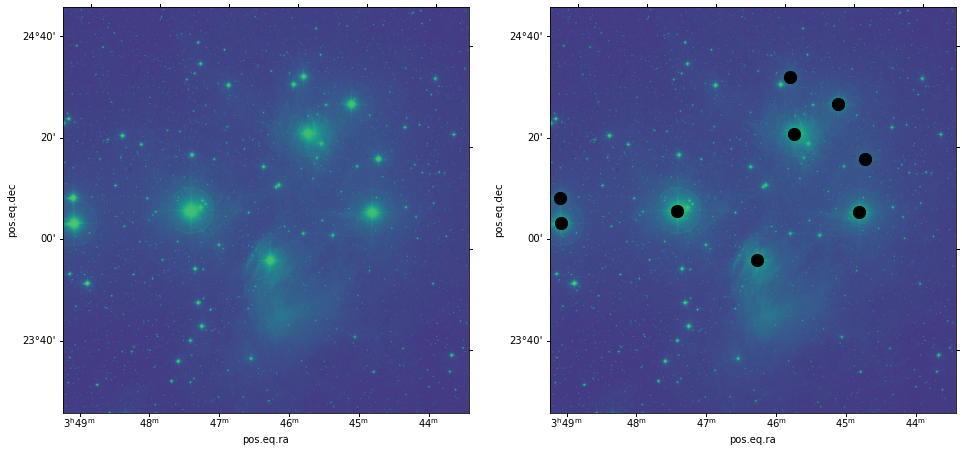

In [19]:
biggies_coords = pleiades_biggies.query(qry_str).get_coords()
biggies_pxs = wcs.world_to_pixel(biggies_coords)
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
#ax.scatter(pxs[0], pxs[1], color='red')
ax = fig.add_subplot(122, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
#ax.scatter(pxs[0], pxs[1], color='red')
#ax.scatter(alcyone_pxs[0], alcyone_pxs[1], color='black', s=150)
ax.scatter(biggies_pxs[0], biggies_pxs[1], color='black', s=150)

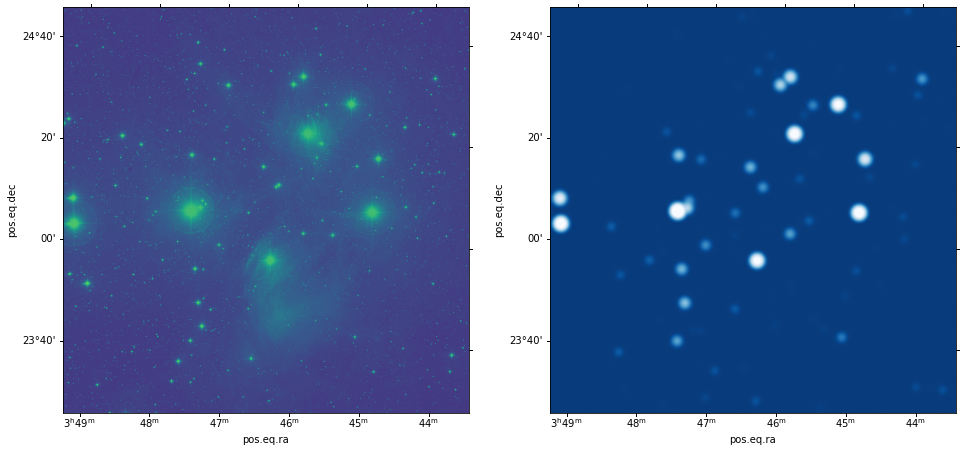

In [20]:
from scipy.stats import multivariate_normal
import matplotlib.colors as colors

np.random.seed(1234)

s = hdu.data.shape
x = np.linspace(-10, 10, s[1], endpoint=True)
y = np.linspace(-10, 10, s[0], endpoint=True)
img = np.zeros(s, dtype=float)
X,Y = np.meshgrid(x,y)
# pos = np.dstack((X,Y))
# scale_factor=np.random.uniform(0,1, size=len(biggies_pxs[0]))
# for sf, p_x, p_y in zip(scale_factor, biggies_pxs[0], biggies_pxs[1]):
#     if np.isnan(p_x): continue
#     mean_x = x[int(p_x)]
#     mean_y = y[int(p_y)]
#     rv = multivariate_normal([mean_x, mean_y], 0.1*sf*np.eye(2))
#     img += sf*np.clip(rv.pdf(pos),0.0, None)

for p_x, p_y, flux in zip(biggies_pxs[0], biggies_pxs[1], pleiades_biggies.objs.phot_g_mean_flux):
    img[int(p_y),int(p_x)] = flux

# the other guys:
coords = pleiades_clipped.get_coords()
pxs = wcs.world_to_pixel(coords)
for p_x, p_y, flux in zip(pxs[0], pxs[1], pleiades_clipped.objs.phot_g_mean_flux):
    if p_x > img.shape[1] or p_y > img.shape[0]:
        continue
    img[int(p_y),int(p_x)] = flux

from scipy.ndimage.filters import gaussian_filter
img = gaussian_filter(img, sigma=20.0, mode='nearest')
# Let's add some noise to the images
noise_dc = 1000
noise_std = np.sqrt(noise_dc)
img += np.random.normal(loc=noise_dc, scale=noise_std, size=img.shape)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
#ax.scatter(biggies_pxs[0], biggies_pxs[1], color='black', s=150)
#ax.scatter(pxs[0 pxs[1], color='red')
ax = fig.add_subplot(122, projection=wcs)
ax.imshow(img, origin='lower', cmap=plt.cm.Blues_r, norm=colors.LogNorm(vmin=800, vmax=100000))
#ax.scatter(pxs[0], pxs[1], color='white', s=1)

In [21]:
sys.path.append('../src')

In [22]:
from plot_obj import plot_obj

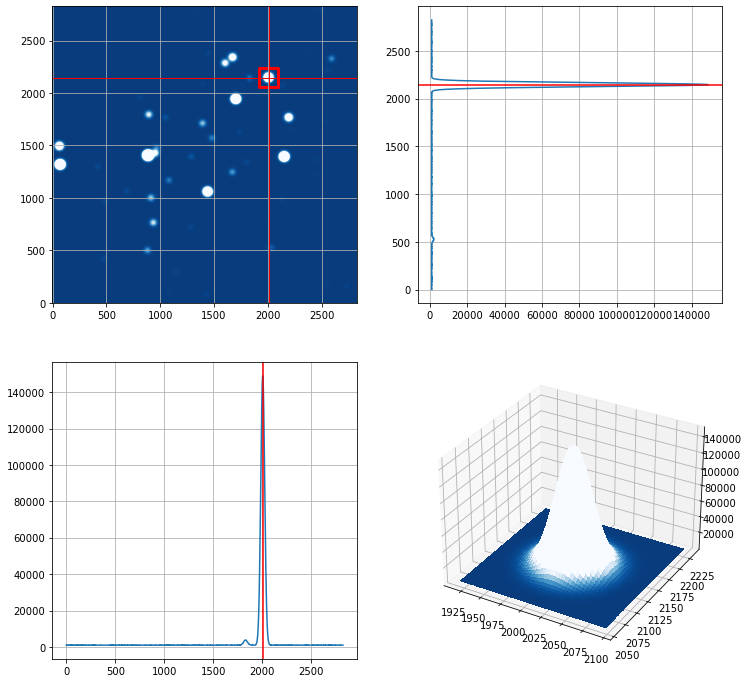

In [27]:
plot_obj(img, xy_val=(biggies_pxs[0][6],biggies_pxs[1][6]), bxsize=180, cmap=plt.cm.Blues_r)

In [67]:
pleiades_clipped.objs.phot_g_mean_flux

typed_id
69806039039416832     1682.763134
69807963184755840     4614.715304
69811364798863744    30866.632295
68294554148575232    66094.377950
68295481861500928    58615.407474
                         ...     
65297251091930624     4646.622514
65297594689312768    10209.154730
65298208867376384     1467.797712
65298483745290368     3979.423593
65299965511216384    10237.003799
Name: phot_g_mean_flux, Length: 247, dtype: float64

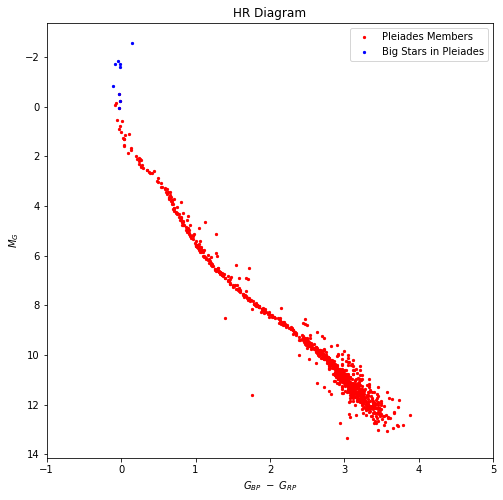

In [20]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
pleiades.plot_hrdiagram(ax=ax, color='red', s=5)
pleiades_biggies.plot_hrdiagram(ax=ax, color='blue', s=5)
ax.legend()


In [43]:
import numpy.ma as ma
import scipy.special as sp

def plot_star(gstar, wcs, XX, YY, FWHM = 6):
    #FWHM = pixels for star diameter

    # color determines color on the color scale
    # bp_rp = np.power(100, (20 - (gstar.phot_bp_mean_mag - gstar.phot_rp_mean_mag))/5)
    # # apparent mag determines spread (analogous to FWHM)
    # app_mag = ((25 - gstar.phot_g_mean_mag)/5) * np.log(100)
    # #rad = np.sqrt(app_mag)*mag0rad
    # rad = np.power(app_mag, 2)*mag0rad

    #https://en.wikipedia.org/wiki/Gaussian_function#Meaning_of_parameters_for_the_general_equation
    # sigma2 = (23-gstar.phot_g_mean_mag)*(FWHM/(2.35482/2.0))**2 
    amplitude = 23-gstar.phot_g_mean_mag 
    #sigma2=FWHM/(5*gstar.phot_g_mean_mag)

    #sigma2 = 14.6*np.power(1.28, (23-g_mag))

    # sigma2 = 12.8*np.power(1.31, (23-gstar.phot_g_mean_mag))
    # #amplitude = 1/gstar.phot_g_mean_mag +8000
    # amplitude = 8000
    
    # pixel on which to center star
    coord = SkyCoord(gstar.ra, gstar.dec, unit=u.deg)
    pix = wcs.world_to_pixel(coord)

    #compute squared pixel distance from star center
    dist = np.power((XX-pix[0])**2 + (YY-pix[1])**2, 1./12.)
    #put in nans at a distance more than sigma frmo the point
    #dist2_ma = np.where(dist2>sigma2, np.nan, dist2)

    #calculate gaussian using the amplitude proportional to apparent magnittude
    # gauss = amplitude*np.exp(-dist2_ma/(2*sigma2))
    #gauss = amplitude*np.exp(-dist2_ma/(4*sigma2))

    gauss =  amplitude*np.power((2*sp.jv(1, dist)/(dist)),2)

    #put the zeros back in and return

    return gauss

In [46]:
s = hdu.data.shape
# x = np.linspace(-10, 10, s[1], endpoint=True)
# y = np.linspace(-10, 10, s[0], endpoint=True)
x = np.arange(s[1])
y = np.arange(s[0])

X,Y = np.meshgrid(x,y)

img = np.zeros(X.shape, dtype=float)

for i in range(len(pleiades_biggies)-1):
    np.maximum(img, plot_star(pleiades_biggies.objs.iloc[i], wcs, X, Y, FWHM = 50), out=img)
for i in range(len(pleiades_clipped)):
    np.maximum(img, plot_star(pleiades_clipped.objs.iloc[i], wcs, X, Y, FWHM = 8000), out=img)# 



Text(0.5, 1.0, 'False Image, Gaia Records')

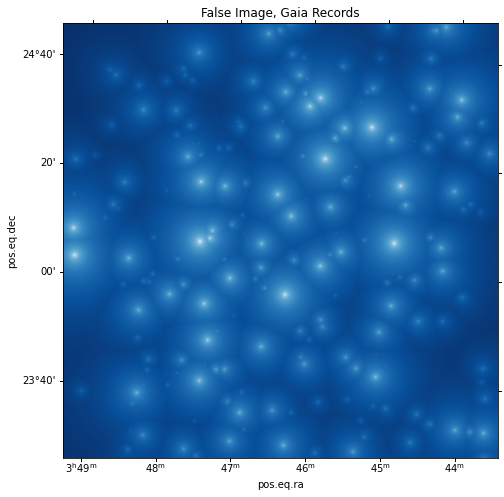

In [48]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=wcs)
ax.imshow(img+4000, origin='lower', cmap=plt.cm.Blues_r)
ax.set_title('False Image, Gaia Records')


In [25]:
pleiades_biggies.objs.phot_g_mean_mag.min(),pleiades_biggies.objs.phot_g_mean_mag.max()

(2.896131992340088, 5.752026081085205)

In [26]:
pleiades_clipped.objs.phot_g_mean_mag.min(),pleiades_clipped.objs.phot_g_mean_mag.max()

(5.203287124633789, 18.54994773864746)

In [27]:
def sig_and_mag(g_mag,FWHM = 6):
    #sigma2 = (23-g_mag)*(FWHM/(2.35482/2.0))
    #sigma2=FWHM/(5*g_mag)
    sigma2 = 12.8*np.power(1.31, (23-g_mag))
    #amplitude = (23-g_mag) **2
    amplitude = 1/g_mag +50
    return sigma2, amplitude

Text(0.5, 1.0, 'Amplitude')

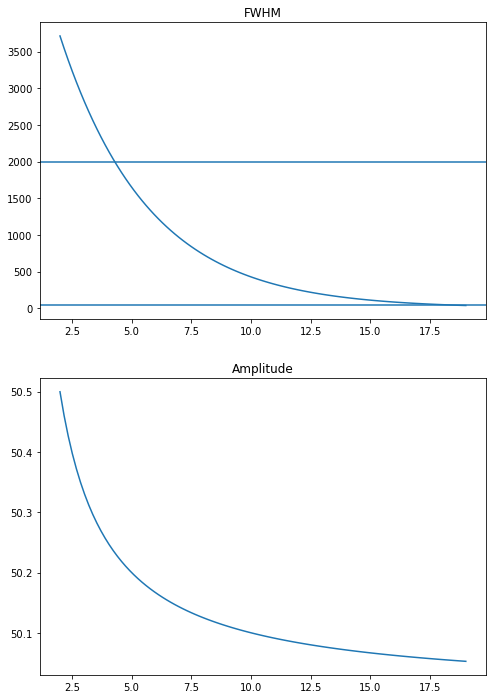

In [28]:
gmag = np.linspace(2,19, 100)
s2, amp = sig_and_mag(gmag, FWHM = 10)

fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(211)
ax.plot(gmag, s2)
ax.set_title('FWHM')
ax.axhline(50)
ax.axhline(2000)

ax = fig.add_subplot(212)
ax.plot(gmag, amp)
ax.set_title('Amplitude')

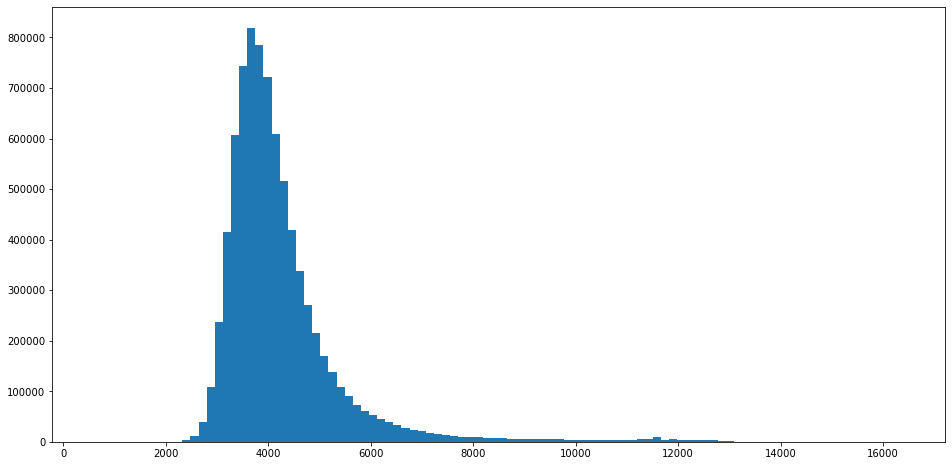

In [29]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
zz=ax.hist(hdu.data.flatten(), bins=100)

In [30]:
hdu.data.max()

16418

Text(0.5, 1.0, 'False Image, Gaia Records')

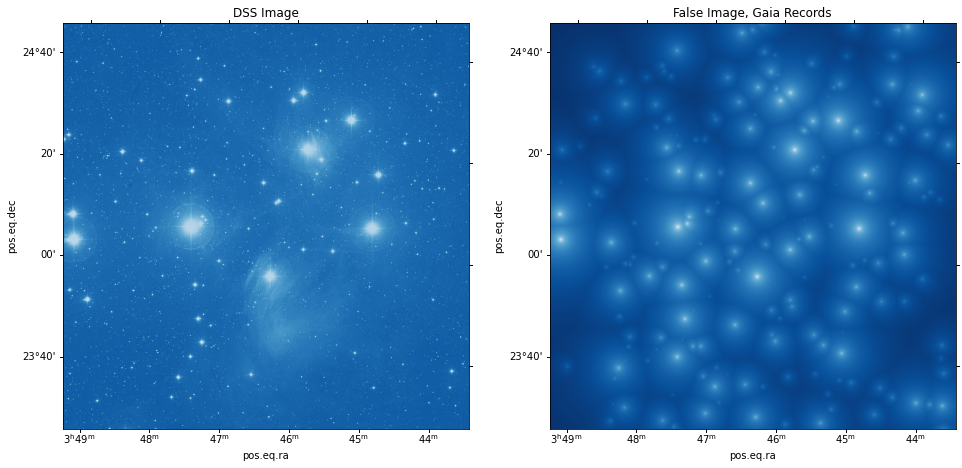

In [49]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection=wcs)
ax.imshow(hdu.data, origin='lower', cmap=plt.cm.Blues_r)
ax.set_title('DSS Image')

ax = fig.add_subplot(122, projection=wcs)
ax.imshow(img+4000, origin='lower', cmap=plt.cm.Blues_r)
ax.set_title('False Image, Gaia Records')


In [27]:
flux_cols = ['ra',
 'dec',
 'parallax',
 'pmra',
 'pmdec',
 'radial_velocity',
 'phot_g_mean_mag',
 'phot_bp_mean_mag',
 'phot_rp_mean_mag',
 'ruwe']+['phot_g_mean_flux', 'phot_bp_mean_flux', 'phot_rp_mean_flux']
gs.gaia_column_dict_gaiadr3['gaiadr3.gaia_source']['tblcols'] = flux_cols
gs.gaia_column_dict_gaiadr3['gaiadr3.gaia_source']['tblcols']

['ra',
 'dec',
 'parallax',
 'pmra',
 'pmdec',
 'radial_velocity',
 'phot_g_mean_mag',
 'phot_bp_mean_mag',
 'phot_rp_mean_mag',
 'ruwe',
 'phot_g_mean_flux',
 'phot_bp_mean_flux',
 'phot_rp_mean_flux']